In [ ]:
#1_IMPORTO LIBRERIAS
import pandas as pd
from datetime import datetime, timedelta

In [ ]:
#2_UNO LOS 4 ARCHIVOS QUE CONTIENEN INFORMACIÓN DE ALTAS HOSPITALARIAS CON DIAGNOSTICO FRACTURA DE CADERA AÑOS 2022, 2023, 2024 Y 2025
import pandas as pd

# URLs of the files
url='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Ictus_2022.csv'
url1='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Ictus_2023.csv'
url2='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Ictus_2024.csv'
url3='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Ictus_2025.csv'

urls = [url, url1, url2, url3]

# Read and concatenate the CSV files from the URLs
df = pd.concat((pd.read_csv(url, encoding='latin-1', delimiter=';') for url in urls), ignore_index=True)

# Display the first few rows of the combined dataframe
display(df.head())
display(df.info())

,Fecha de ingreso,Fecha de alta,Día de la semana en la fecha del ingreso,Día de la semana en la fecha del alta,Zona Básica de Salud del Paciente,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo
0,01/01/2022 00:45:00,10/01/2022 14:01:00,Sábado,Lunes,Z.B.S. Bierzo,Urbano,H. El Bierzo,Bierzo,León,87,Mujer
1,01/01/2022 01:38:00,03/01/2022 20:32:00,Sábado,Lunes,Z.B.S. La Victoria,Urbano,H.C.U. Valladolid,Valladolid Este,Valladolid,71,Hombre
2,01/01/2022 13:44:00,10/01/2022 09:50:00,Sábado,Lunes,Z.B.S. Plaza del Ejército,Urbano,H.U. Río Hortega,Valladolid Oeste,Valladolid,64,Mujer
3,01/01/2022 13:57:00,13/01/2022 14:12:00,Sábado,Jueves,Z.B.S. Medina del Campo Urbano,Urbano,H.C.U. Valladolid,Valladolid Este,Valladolid,83,Mujer
4,01/01/2022 14:42:00,08/01/2022 16:00:00,Sábado,Sábado,Z.B.S. Parquesol,Urbano,H.C.U. Valladolid,Valladolid Este,Valladolid,57,Mujer


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17837 entries, 0 to 17836
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Fecha de ingreso                          17837 non-null  object
 1   Fecha de alta                             17837 non-null  object
 2   Día de la semana en la fecha del ingreso  17837 non-null  object
 3   Día de la semana en la fecha del alta     17837 non-null  object
 4   Zona Básica de Salud del Paciente         17832 non-null  object
 5   Ámbito de procedencia                     17832 non-null  object
 6   Hospital                                  17837 non-null  object
 7   Área                                      17837 non-null  object
 8   Provincia                                 17837 non-null  object
 9   Edad                                      17837 non-null  int64 
 10  Sexo                                      1783

None

In [ ]:
# 3_CONVIERTO FECHAS EN DATATIME
df['Fecha de ingreso'] = pd.to_datetime(df['Fecha de ingreso'], format='%d/%m/%Y %H:%M:%S')
df['Fecha de alta'] = pd.to_datetime(df['Fecha de alta'], format='%d/%m/%Y %H:%M:%S')

In [ ]:
# GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
df.to_csv('4_altas_hospitalarias_ictus.csv', index=False)

In [ ]:
# 4_AGREGO UNA COLUMNA 'FECHA HOSPITALIZADO' QUE CONTIENE LA FECHA EN QUE UNA PERSONA ESTA INTERNADA Y AGREGRO UNA FILA POR CADA DÍA QUE LA PERSONA ESTA HOSPITALIZADA PARA PODER FINALMENTE TENER LA INFORMACIÓN DE INTERNACIÓN
# POR DIA POR HOSPITAL

expanded_rows = []

for _, row in df.iterrows():
    ingreso = row['Fecha de ingreso']
    alta = row['Fecha de alta']
    current_date = ingreso.date()
    while current_date <= alta.date():
        new_row = row.copy()
        new_row['fecha_hosp_ictus'] = current_date
        expanded_rows.append(new_row)
        current_date += timedelta(days=1)

# Crear nuevo DataFrame expandido
expanded_df = pd.DataFrame(expanded_rows)

In [ ]:
# 5_ESTA NUEVA COLUMNA 'FECHA HOSPITALIZADO' LA CONVIERTO EN OBJETO DATATIME
expanded_df['fecha_hosp_ictus'] = pd.to_datetime(expanded_df['fecha_hosp_ictus'])



In [ ]:
# 6_PARA CHEQUEAR INFO NUEVA
display(expanded_df.head())
display(expanded_df.tail())
display(expanded_df.info())

,Fecha de ingreso,Fecha de alta,Día de la semana en la fecha del ingreso,Día de la semana en la fecha del alta,Zona Básica de Salud del Paciente,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo,fecha_hosp_ictus
0,2022-01-01 00:45:00,2022-01-10 14:01:00,Sábado,Lunes,Z.B.S. Bierzo,Urbano,H. El Bierzo,Bierzo,León,87,Mujer,2022-01-01
0,2022-01-01 00:45:00,2022-01-10 14:01:00,Sábado,Lunes,Z.B.S. Bierzo,Urbano,H. El Bierzo,Bierzo,León,87,Mujer,2022-01-02
0,2022-01-01 00:45:00,2022-01-10 14:01:00,Sábado,Lunes,Z.B.S. Bierzo,Urbano,H. El Bierzo,Bierzo,León,87,Mujer,2022-01-03
0,2022-01-01 00:45:00,2022-01-10 14:01:00,Sábado,Lunes,Z.B.S. Bierzo,Urbano,H. El Bierzo,Bierzo,León,87,Mujer,2022-01-04
0,2022-01-01 00:45:00,2022-01-10 14:01:00,Sábado,Lunes,Z.B.S. Bierzo,Urbano,H. El Bierzo,Bierzo,León,87,Mujer,2022-01-05


,Fecha de ingreso,Fecha de alta,Día de la semana en la fecha del ingreso,Día de la semana en la fecha del alta,Zona Básica de Salud del Paciente,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo,fecha_hosp_ictus
17836,2024-12-31 20:00:00,2025-01-09 14:00:00,Martes,Jueves,Z.B.S. Bembibre,Rural,H. El Bierzo,Bierzo,León,85,Mujer,2025-01-05
17836,2024-12-31 20:00:00,2025-01-09 14:00:00,Martes,Jueves,Z.B.S. Bembibre,Rural,H. El Bierzo,Bierzo,León,85,Mujer,2025-01-06
17836,2024-12-31 20:00:00,2025-01-09 14:00:00,Martes,Jueves,Z.B.S. Bembibre,Rural,H. El Bierzo,Bierzo,León,85,Mujer,2025-01-07
17836,2024-12-31 20:00:00,2025-01-09 14:00:00,Martes,Jueves,Z.B.S. Bembibre,Rural,H. El Bierzo,Bierzo,León,85,Mujer,2025-01-08
17836,2024-12-31 20:00:00,2025-01-09 14:00:00,Martes,Jueves,Z.B.S. Bembibre,Rural,H. El Bierzo,Bierzo,León,85,Mujer,2025-01-09


<class 'pandas.core.frame.DataFrame'>
Index: 163068 entries, 0 to 17836
Data columns (total 12 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Fecha de ingreso                          163068 non-null  datetime64[ns]
 1   Fecha de alta                             163068 non-null  datetime64[ns]
 2   Día de la semana en la fecha del ingreso  163068 non-null  object        
 3   Día de la semana en la fecha del alta     163068 non-null  object        
 4   Zona Básica de Salud del Paciente         163032 non-null  object        
 5   Ámbito de procedencia                     163032 non-null  object        
 6   Hospital                                  163068 non-null  object        
 7   Área                                      163068 non-null  object        
 8   Provincia                                 163068 non-null  object        
 9   Edad                 

None

In [ ]:
#7 TOTAL DE PACIENTES HOSPITALIZADOS POR DÍA POR HOSPITAL
Ocupación_total_diaria = expanded_df.groupby(['fecha_hosp_ictus', 'Hospital']).size().reset_index(name='Occupancy')

Ocupación_total_diaria.head()

,fecha_hosp_ictus,Hospital,Occupancy
0,2021-10-02,C.A.U. Burgos,1
1,2021-10-03,C.A.U. Burgos,1
2,2021-10-04,C.A.U. Burgos,1
3,2021-10-05,C.A.U. Burgos,1
4,2021-10-06,C.A.U. Burgos,1


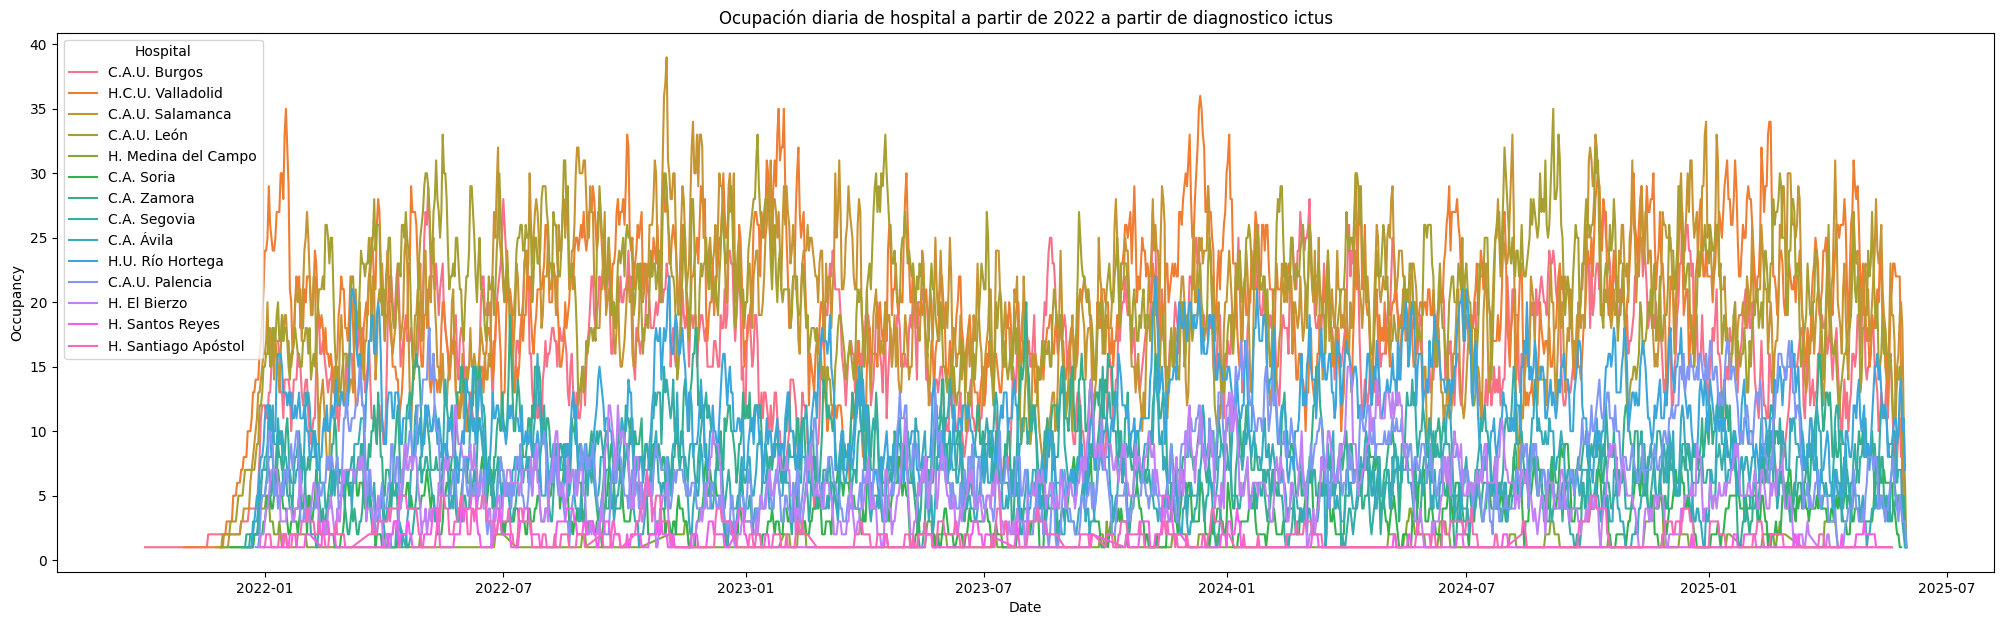

In [ ]:
#7_VER LOS REULTADOS GRAFICADOS POR DÍA POR HOSPITAL

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 7))
sns.lineplot(data=Ocupación_total_diaria, x='fecha_hosp_ictus', y='Occupancy', hue='Hospital')
plt.title('Ocupación diaria de hospital a partir de 2022 a partir de diagnostico ictus')
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.show()

In [ ]:
#8 GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
Ocupación_total_diaria.to_csv('4_Ocupación_total_diaria_hosp_ictus.csv', index=False)
